In [1]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import keras

%matplotlib inline

Using TensorFlow backend.


In [2]:
import pickle

In [3]:
with open("faces_dataset_conv2.pickle", "rb") as f:
    data = pickle.load(f)

In [4]:
train_ds = data["train_dataset"]
train_labels = data["train_labels"]
pub_test_ds = data["public_test"]
pub_test_labels = data["public_test_labels"]
priv_test_ds = data["private_test"]
priv_test_labels = data["private_test_labels"]

In [5]:
names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
names_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

In [11]:
# labels_train_txt = list(map(lambda x: labels_dict[x], train_labels))


In [20]:
def get_pie_chart(labels):
    sizes = []
    for i in range(7): 
        sizes.append(sum(labels == i))
    plt.figure(figsize=(10,10))

    plt.pie(sizes, labels=names, autopct='%1.1f%%', shadow=True)
#     plt.legend(patches, names, loc="best")

    plt.axis('equal')
    plt.show()

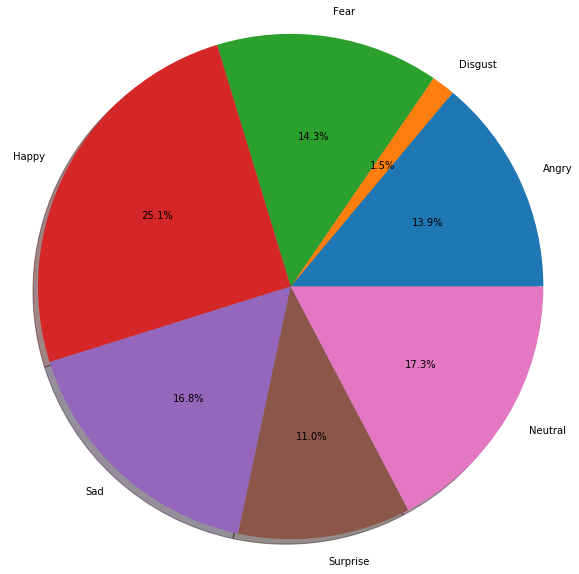

In [21]:
get_pie_chart(train_labels)

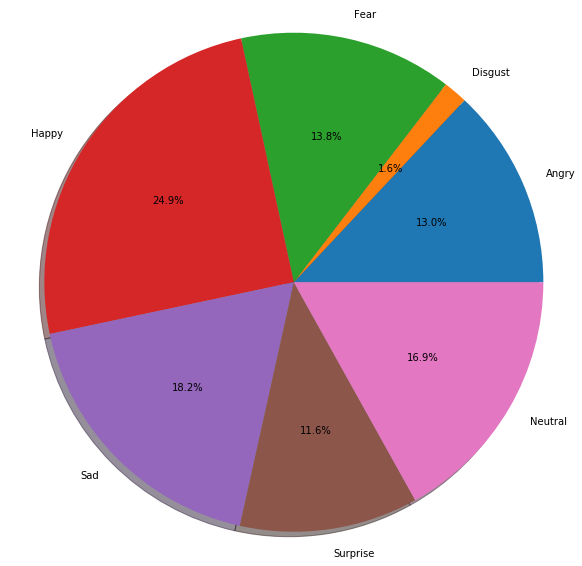

In [22]:
get_pie_chart(pub_test_labels)

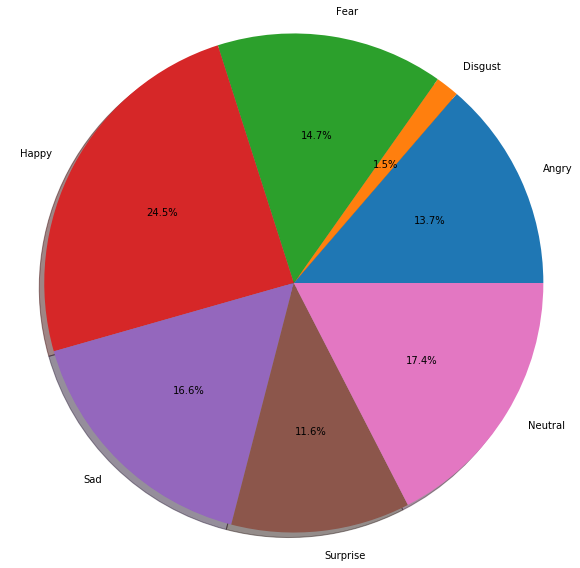

In [23]:
get_pie_chart(priv_test_labels)

In [ ]:
def show_10_images_each_class(ds):
    fig=plt.figure(figsize=(8, 8))
    columns = 4
    rows = 7
    for i in range(1, columns*rows +1):
        img = np.random.randint(10, size=(h,w))
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

In [27]:
import random

In [35]:
len(train_ds[train_labels==2])

4097

In [55]:
def show_10_images_each_class(ds, ds_labels):
    fig, axs = plt.subplots(7, 10, figsize=(15, 15))
    k = 0
    for label, ax in zip(names, axs):
        ax[0].set_ylabel(label+ "        ", rotation=0, size='large')
        current = ds[ds_labels == k] 
        k += 1
#         print(len(current), k)
        sample = current[random.sample(range(len(current)), k=10)]
#         print(sample.shape)
        
        for i in range(10):
            ax[i].imshow(sample[i].reshape(48, 48), cmap='gray')
            ax[i].set_xticklabels([])
            ax[i].set_yticklabels([])

    plt.show()

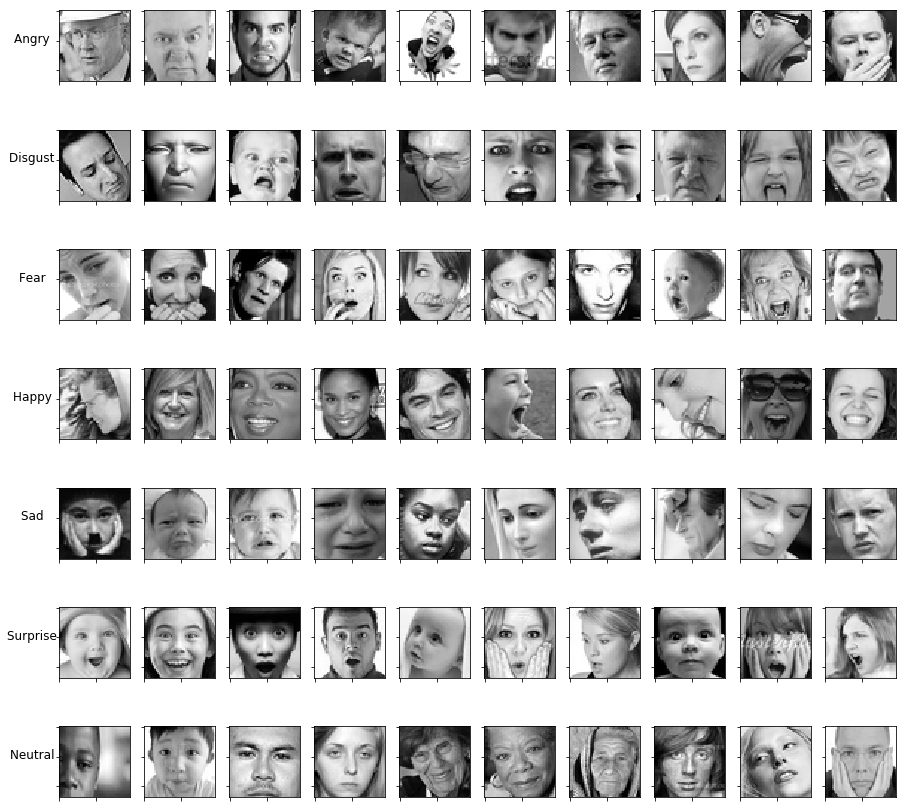

In [56]:
show_10_images_each_class(train_ds, train_labels)

In [59]:
len(priv_test_ds) / (len(train_ds) + len(priv_test_ds) + len(pub_test_ds)) 

0.10000835957310447

In [62]:
import math
math.log(0.95)

-0.05129329438755058

In [63]:
from keras.models import load_model

In [64]:
from keras.utils.vis_utils import plot_model

In [65]:
model = load_model("experiment_2_no_multi.hdf5")

C:\Users\thalv\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\engine\saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [68]:
plot_model(model, to_file='model.png',show_shapes=True)